In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import scipy.io
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import requests
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.svm import SVC
from tensorflow.keras.layers import Dense, Flatten

In [4]:
# Load the training and testing dataset
train_data = loadmat('/content/drive/My Drive/Colab Notebooks/Asgmt5/train_32x32.mat')
test_data = loadmat('/content/drive/My Drive/Colab Notebooks/Asgmt5/test_32x32.mat')

In [5]:
# Extract images and labels from the loaded dataset
X_train = train_data['X']  # Training images
y_train = train_data['y']  # Training labels
X_test = test_data['X']    # Testing images
y_test = test_data['y']    # Testing labels

In [6]:
# Transpose the images to be in the shape (N, H, W, C)
X_train = np.transpose(X_train, (3, 0, 1, 2))  # Shape: (N, 32, 32, 3)
X_test = np.transpose(X_test, (3, 0, 1, 2))    # Shape: (N, 32, 32, 3)

In [7]:
# Flatten the labels to be 1D arrays
y_train = y_train.flatten()  # Shape: (N,)
y_test = y_test.flatten()    # Shape: (N,)

In [8]:
y_train.shape

(73257,)

In [9]:
np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

Text(0.5, 0, '1')

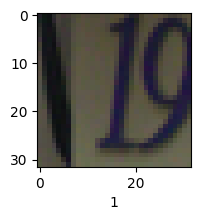

In [10]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])
plt.xlabel(y_train[0])

In [11]:
# Adjust labels to convert '10' to '0' since the labels for digit '0' are marked as '10' in the dataset
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0


In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
#Normalize the images to range [0, 1] to improve efficiency and performance of Machine Learning
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
# Flatten image
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [15]:
X_train.shape

(73257, 3072)

In [16]:
# Step 2: Train Classifiers

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [17]:
# Decision Tree Evaluation
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Performance:")
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.35
              precision    recall  f1-score   support

           0       0.39      0.17      0.24      1744
           1       0.35      0.69      0.47      5099
           2       0.31      0.53      0.39      4149
           3       0.38      0.23      0.28      2882
           4       0.48      0.32      0.39      2523
           5       0.35      0.23      0.28      2384
           6       0.30      0.16      0.21      1977
           7       0.49      0.21      0.30      2019
           8       0.30      0.14      0.19      1660
           9       0.42      0.11      0.18      1595

    accuracy                           0.35     26032
   macro avg       0.38      0.28      0.29     26032
weighted avg       0.37      0.35      0.33     26032

[[ 303  511  438  143   95   68  123   31   18   14]
 [  92 3526  896  162   93   60  114   97   43   16]
 [  57 1019 2196  212  220  131   63  132   84   35]
 [  36  945  726  650  110  221   39   5

In [ ]:
# # Support Vector Machine (SVM) Classifier
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# svm_model = SVC(kernel='rbf')
# svm_model.fit(X_train_scaled, y_train)


In [ ]:
# # SVM Evaluation
# y_pred_svm = svm_model.predict(X_test_scaled)
# accuracy = accuracy_score(y_test, y_pred_svm)
# print(f'Accuracy: {accuracy:.2f}')
# print("SVM Performance:")
# print(classification_report(y_test, y_pred_svm))

In [18]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Random Forest Evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_dt))

Random Forest Performance:
Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.75      0.58      0.66      1744
           1       0.62      0.91      0.74      5099
           2       0.70      0.78      0.74      4149
           3       0.65      0.58      0.62      2882
           4       0.63      0.77      0.69      2523
           5       0.75      0.57      0.65      2384
           6       0.66      0.59      0.62      1977
           7       0.82      0.55      0.66      2019
           8       0.77      0.44      0.56      1660
           9       0.79      0.51      0.62      1595

    accuracy                           0.68     26032
   macro avg       0.71      0.63      0.65     26032
weighted avg       0.70      0.68      0.67     26032

[[ 303  511  438  143   95   68  123   31   18   14]
 [  92 3526  896  162   93   60  114   97   43   16]
 [  57 1019 2196  212  220  131   63  132   84   35]
 [  36  945  726  650  110  221   39   5

In [21]:
# np.unique(y_train)

In [24]:
# y_train -=1

In [21]:
# Neural Network (NN) Classifier (5,000 parameters)
nn_model_5000 = Sequential([
    # Adjusted to approximately match 5,000 parameters
    Dense(2, activation='relu', input_shape=(3072,)),
    Dense(11, activation='softmax')
])
nn_model_5000.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

nn_model_5000.summary()

nn_model_5000.fit(X_train, y_train, epochs=10, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │           6,146 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,179 (24.14 KB)

 Trainable params: 6,179 (24.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1886 - loss: 2.3300
Epoch 2/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1903 - loss: 2.2604
Epoch 3/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2109 - loss: 2.2236
Epoch 4/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2227 - loss: 2.1899
Epoch 5/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2479 - loss: 2.1543
Epoch 6/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2567 - loss: 2.1216
Epoch 7/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2588 - loss: 2.1097
Epoch 8/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2546 - loss: 2.1105
Epoch 9/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2587 - loss: 2.1016
Epoch 10/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2607 - loss: 2.0931


In [22]:
# Neural Network Evaluation (~5,000 parameters)
y_pred_nn_5000 = nn_model_5000.predict(X_test).argmax(axis=1)
print("Neural Network Performance 5,000 parameters:")
loss, accuracy = nn_model_5000.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_nn_5000))
print(confusion_matrix(y_test, y_pred_nn_5000))

814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Performance 5,000 parameters:
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2626 - loss: 2.1021
Accuracy: 0.26
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1744
           1       0.22      0.94      0.35      5099
           2       0.49      0.26      0.34      4149
           3       0.00      0.00      0.00      2882
           4       0.53      0.36      0.43      2523
           5       0.00      0.00      0.00      2384
           6       0.00      0.00      0.00      1977
           7       0.44      0.01      0.01      2019
           8       0.00      0.00      0.00      1660
           9       0.00      0.00      0.00      1595

    accuracy                           0.26     26032
   macro avg       0.17      0.16      0.11     26032
weighted avg       0.21      0.26      0.17     26032

[[   0 1636   33    0   74    0    0    1    0    0]
 [   0 4794 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
# Neural Network (NN) Classifier (10,000 parameters)
nn_model_10000 = Sequential([
    # Adjusted to approximately match 10,000 parameters
    Dense(3, activation='relu', input_shape=(3072,)),
    Dense(11, activation='softmax')
])
nn_model_10000.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

nn_model_10000.summary()

nn_model_10000.fit(X_train, y_train, epochs=10, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3)                   │           9,219 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │              44 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,263 (36.18 KB)

 Trainable params: 9,263 (36.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1898 - loss: 2.2979
Epoch 2/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1886 - loss: 2.2385
Epoch 3/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1924 - loss: 2.2284
Epoch 4/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1950 - loss: 2.1884
Epoch 5/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2097 - loss: 2.1693
Epoch 6/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2314 - loss: 2.1405
Epoch 7/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2399 - loss: 2.1085
Epoch 8/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2446 - loss: 2.0881
Epoch 9/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2413 - loss: 2.0733
Epoch 10/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2486 - loss: 2.0658


In [24]:
# Neural Network Evaluation 10,000 parameters
y_pred_nn_10000 = nn_model_10000.predict(X_test).argmax(axis=1)
print("Neural Network Performance 10,000 parameters:")
loss, accuracy = nn_model_10000.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_nn_10000))
print(confusion_matrix(y_test, y_pred_nn_10000))

814/814 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Neural Network Performance 10,000 parameters:
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2500 - loss: 2.0832
Accuracy: 0.25
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1744
           1       0.36      0.78      0.49      5099
           2       0.18      0.51      0.26      4149
           3       0.00      0.00      0.00      2882
           4       0.00      0.00      0.00      2523
           5       0.17      0.23      0.20      2384
           6       0.00      0.00      0.00      1977
           7       0.00      0.00      0.00      2019
           8       0.00      0.00      0.00      1660
           9       0.00      0.00      0.00      1595

    accuracy                           0.25     26032
   macro avg       0.07      0.15      0.10     26032
weighted avg       0.11      0.25      0.16     26032

[[   0  253 1060    0    0  431    0    0    0    0]
 [   0 3959

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
# Neural Network (NN) Classifier (20,000 parameters)
nn_model_20000 = Sequential([
    # Adjusted to approximately match 20,000 parameters
    Dense(6, activation='relu', input_shape=(3072,)),
    Dense(11, activation='softmax')
])
nn_model_20000.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

nn_model_20000.summary()

nn_model_20000.fit(X_train, y_train, epochs=10, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 6)                   │          18,438 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │              77 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,515 (72.32 KB)

 Trainable params: 18,515 (72.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.1836 - loss: 2.3296
Epoch 2/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1898 - loss: 2.2462
Epoch 3/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1997 - loss: 2.2229
Epoch 4/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.2079 - loss: 2.2075
Epoch 5/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2177 - loss: 2.1778
Epoch 6/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2196 - loss: 2.1590
Epoch 7/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2349 - loss: 2.1309
Epoch 8/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2497 - loss: 2.0793
Epoch 9/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2982 - loss: 1.9876
Epoch 10/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3289 - loss: 1.9079


In [26]:
# Neural Network Evaluation (~20,000 parameters)
y_pred_nn_20000 = nn_model_20000.predict(X_test).argmax(axis=1)
print("Neural Network Performance 20,000 parameters:")
loss, accuracy = nn_model_20000.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_nn_20000))
print(confusion_matrix(y_test, y_pred_nn_20000))


814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Neural Network Performance 20,000 parameters:
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3163 - loss: 1.9955
Accuracy: 0.32
              precision    recall  f1-score   support

           0       0.37      0.06      0.10      1744
           1       0.71      0.45      0.55      5099
           2       0.23      0.79      0.36      4149
           3       0.23      0.31      0.26      2882
           4       0.55      0.20      0.30      2523
           5       0.43      0.20      0.27      2384
           6       0.50      0.10      0.17      1977
           7       0.53      0.08      0.13      2019
           8       0.46      0.05      0.09      1660
           9       0.24      0.26      0.25      1595

    accuracy                           0.32     26032
   macro avg       0.43      0.25      0.25     26032
weighted avg       0.44      0.32      0.30     26032

[[ 101   47  944  213   36   25   36    1   34  307]
 [   9 2300

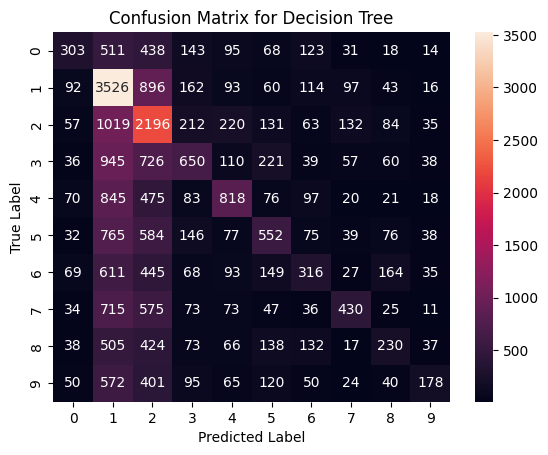

In [27]:
# Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# # Confusion Matrix for SVM
# cm = confusion_matrix(y_test, y_pred_svm)
# sns.heatmap(cm, annot=True, fmt='d')
# plt.title('Confusion Matrix for SVM')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

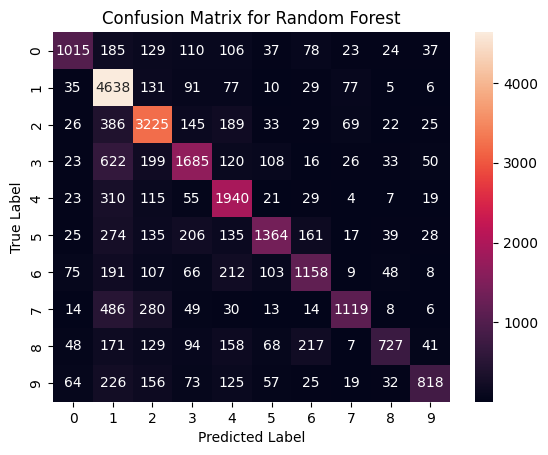

In [28]:

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

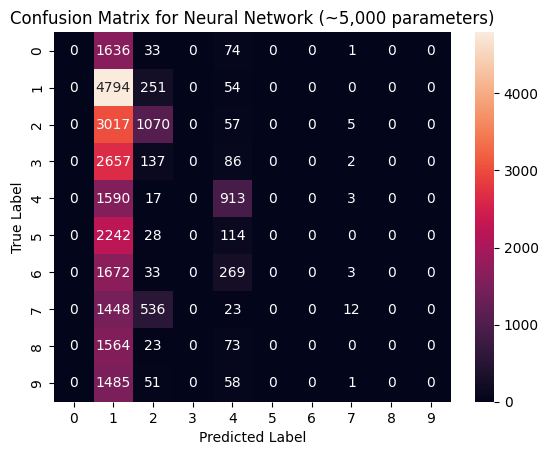

In [29]:
# Confusion Matrix for Neural Network (5,000 parameters)
cm = confusion_matrix(y_test, y_pred_nn_5000)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Neural Network (~5,000 parameters)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

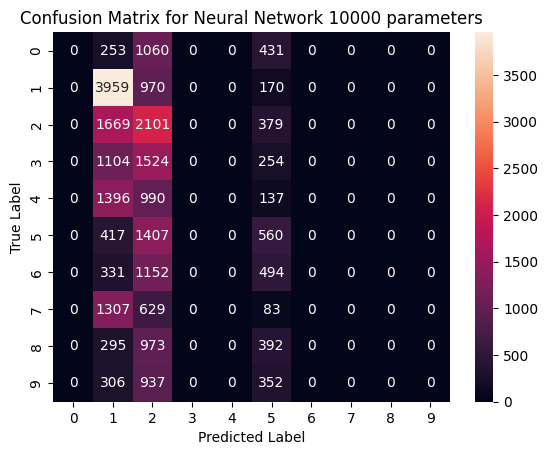

In [30]:
# Confusion Matrix for Neural Network 10000 parameters
cm = confusion_matrix(y_test, y_pred_nn_10000)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Neural Network 10000 parameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

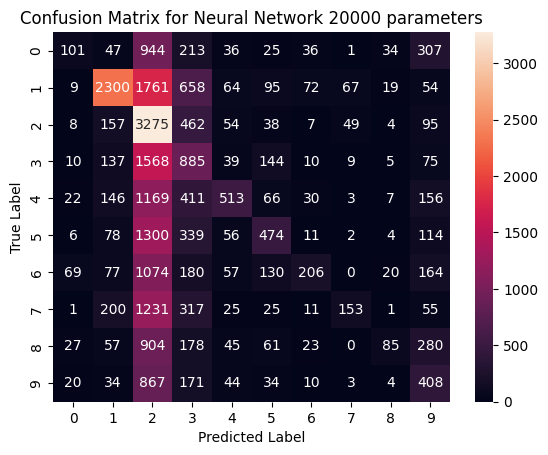

In [31]:
# Confusion Matrix for Neural Network 5000 parameters
cm = confusion_matrix(y_test, y_pred_nn_20000)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Neural Network 20000 parameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

1.0  Confidence


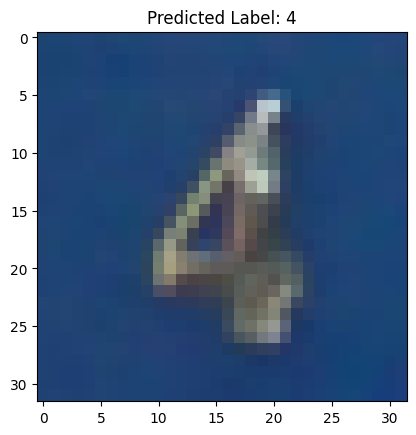

In [34]:
# Identify the label in the test data that is predicted with the highest confidence.
# Plot the corresponding image and display its predicted class. Decision tree

predictions = dt_model.predict_proba(X_test)

predicted_confidence_index = np.argmax(predictions)
confidence = np.max(predictions)

print(confidence, " Confidence")

high_confidence_idx = np.argmax(np.max(predictions, axis=1))
plt.imshow(X_test[high_confidence_idx].reshape(32, 32, 3))
plt.title(f'Predicted Label: {y_pred_dt[high_confidence_idx]}')
plt.show()

1.0  Confidence


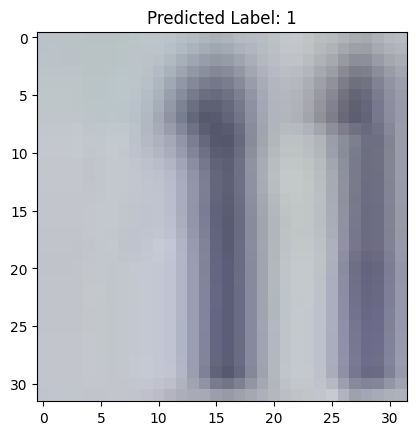

In [35]:
# Identify the label in the test data that is predicted with the highest confidence.
# Plot the corresponding image and display its predicted class. Random forest
predictions = rf_model.predict_proba(X_test)

predicted_confidence_index = np.argmax(predictions)
confidence = np.max(predictions)

print(confidence, " Confidence")

high_confidence_idx = np.argmax(np.max(predictions, axis=1))
plt.imshow(X_test[high_confidence_idx].reshape(32, 32, 3))
plt.title(f'Predicted Label: {y_pred_rf[high_confidence_idx]}')
plt.show()

814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
0.9993673  Confidence


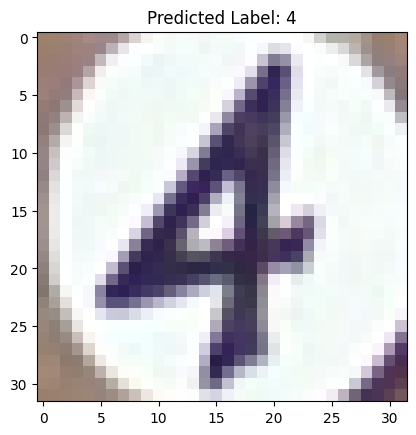

In [37]:
# Identify the label in the test data that is predicted with the highest confidence.
# Plot the corresponding image and display its predicted class. nn_5000
predictions = nn_model_5000.predict(X_test)

predicted_confidence_index = np.argmax(predictions)
confidence = np.max(predictions)

print(confidence, " Confidence")

high_confidence_idx = np.argmax(np.max(predictions, axis=1))
plt.imshow(X_test[high_confidence_idx].reshape(32, 32, 3))
plt.title(f'Predicted Label: {y_pred_nn_5000[high_confidence_idx]}')
plt.show()





814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
0.99504715  Confidence


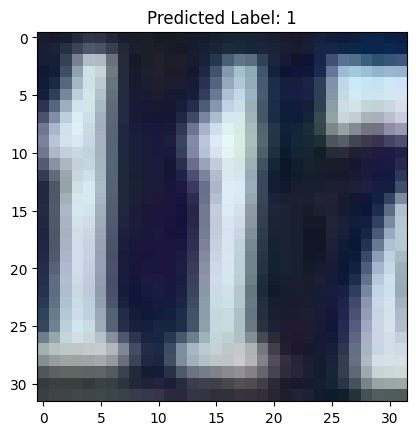

In [38]:
# Identify the label in the test data that is predicted with the highest confidence.
# Plot the corresponding image and display its predicted class. nn_10000

predictions = nn_model_10000.predict(X_test)

predicted_confidence_index = np.argmax(predictions)
confidence = np.max(predictions)

print(confidence, " Confidence")

high_confidence_idx = np.argmax(np.max(predictions, axis=1))
plt.imshow(X_test[high_confidence_idx].reshape(32, 32, 3))
plt.title(f'Predicted Label: {y_pred_nn_10000[high_confidence_idx]}')
plt.show()

814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.9999775  Confidence


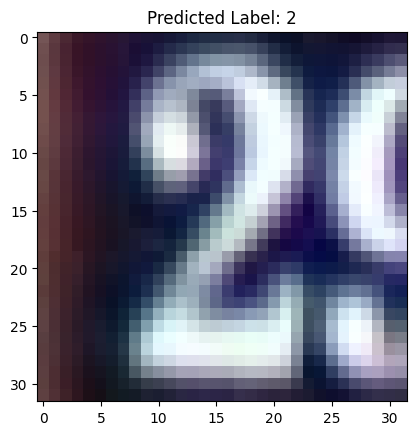

In [39]:
# Identify the label in the test data that is predicted with the highest confidence.
# Plot the corresponding image and display its predicted class. nn_20000
predictions = nn_model_20000.predict(X_test)

predicted_confidence_index = np.argmax(predictions)
confidence = np.max(predictions)

print(confidence, " Confidence")

high_confidence_idx = np.argmax(np.max(predictions, axis=1))
plt.imshow(X_test[high_confidence_idx].reshape(32, 32, 3))
plt.title(f'Predicted Label: {y_pred_nn_20000[high_confidence_idx]}')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


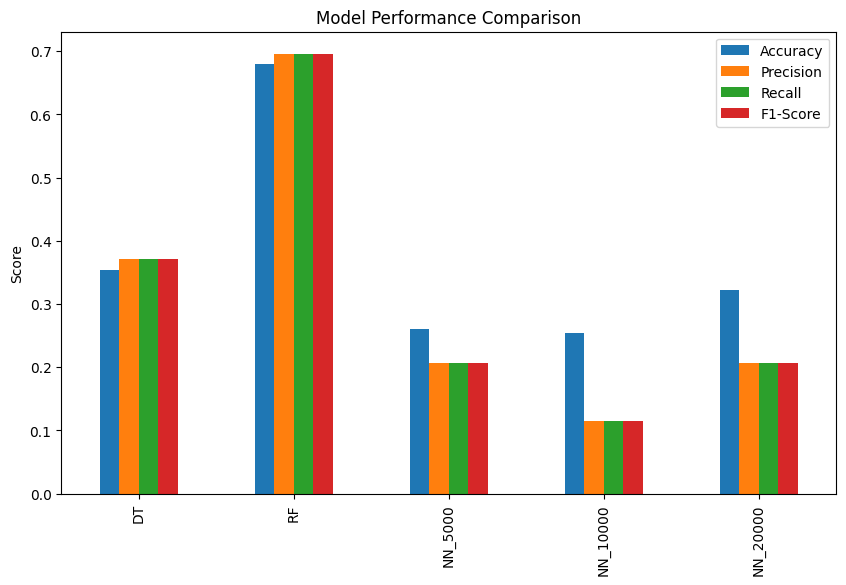

In [53]:
# Compare the overall performance of each classifier

perf_dt = precision_recall_fscore_support(y_test, y_pred_dt, average='weighted')
perf_rf = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
perf_nn_5000 = precision_recall_fscore_support(y_test, y_pred_nn_5000, average='weighted')
perf_nn_10000 = precision_recall_fscore_support(y_test, y_pred_nn_10000, average='weighted')
perf_nn_20000 = precision_recall_fscore_support(y_test, y_pred_nn_20000, average='weighted')


metrics = {
    'Accuracy': [accuracy_score(y_test, y_pred_dt),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_nn_5000),
                 accuracy_score(y_test, y_pred_nn_10000),
                 accuracy_score(y_test, y_pred_nn_20000)],

    'Precision': [perf_dt[0], perf_rf[0], perf_nn_5000[0], perf_nn_10000[0], perf_nn_5000[0]],
    'Recall': [perf_dt[0], perf_rf[0], perf_nn_5000[0], perf_nn_10000[0], perf_nn_5000[0]],
    'F1-Score': [perf_dt[0], perf_rf[0], perf_nn_5000[0], perf_nn_10000[0], perf_nn_5000[0]],
}

# df_metrics = pd.DataFrame(metrics, columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=['DT', 'RF', 'NN_5000', 'NN_10000', 'NN_20000' ]),

df_metrics = pd.DataFrame(metrics, columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                          index=['DT', 'RF', 'NN_5000', 'NN_10000', 'NN_20000' ])

df_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()